In [1]:
import xinfer
model = xinfer.create_model("ultralytics/yolov8s", device="cuda", dtype="bfloat16")

2024-11-10 00:40:11.793 | INFO     | xinfer.models:__init__:63 - Model: ultralytics/yolov8s
2024-11-10 00:40:11.794 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-10 00:40:11.794 | INFO     | xinfer.models:__init__:65 - Dtype: bfloat16


In [2]:
result = model.infer("/home/dnth/Downloads/two.jpg")
result


0: 448x640 2 persons, 50.0ms
Speed: 1.7ms preprocess, 50.0ms inference, 64.1ms postprocess per image at shape (1, 3, 448, 640)


Result(categories=None, boxes=[Box(x1=258.3984375, y1=26.3671875, x2=404.7890625, y2=333.28125, score=0.94189453125, label='person'), Box(x1=139.8515625, y1=23.8359375, x2=261.7734375, y2=322.734375, score=0.9404296875, label='person')], masks=None, poses=None, text=None)

In [3]:
result.boxes

[Box(x1=258.3984375, y1=26.3671875, x2=404.7890625, y2=333.28125, score=0.94189453125, label='person'),
 Box(x1=139.8515625, y1=23.8359375, x2=261.7734375, y2=322.734375, score=0.9404296875, label='person')]

In [4]:
def plot_detections(image_path, boxes=None, masks=None, figsize=(10,10)):
    """
    Plot detection boxes and masks over an image
    
    Args:
        image_path (str): Path to the image file
        boxes (list): List of Box objects containing x1,y1,x2,y2,score,label
        masks (list): List of mask coordinates [x,y]
        figsize (tuple): Figure size for the plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from PIL import Image
    from matplotlib.patches import Rectangle
    
    # Read the image
    img = Image.open(image_path)
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # Display the image
    ax.imshow(img)
    
    # Plot masks if provided
    if masks is not None:
        for mask in masks:
            mask_xy = np.array(mask)
            x = mask_xy[:, 0]
            y = mask_xy[:, 1]
            ax.fill(x, y, alpha=0.3, color='red')
            ax.plot(x, y, 'r-', linewidth=1, alpha=0.5)
    
    # Plot boxes if provided
    if boxes is not None:
        for box in boxes:
            # Create rectangle patch
            width = box.x2 - box.x1
            height = box.y2 - box.y1
            rect = Rectangle(
                (box.x1, box.y1),
                width,
                height,
                linewidth=2,
                edgecolor='blue',
                facecolor='none'
            )
            ax.add_patch(rect)
            
            # Add label and score
            label_text = f'{box.label}: {box.score:.2f}'
            ax.text(
                box.x1, 
                box.y1 - 5, 
                label_text, 
                color='blue', 
                fontsize=10, 
                backgroundcolor='white'
            )
    
    plt.axis('off')
    plt.show()

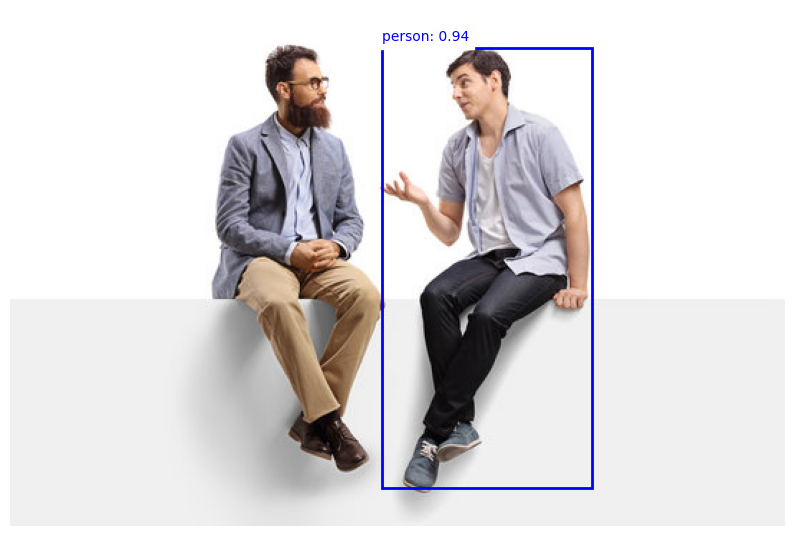

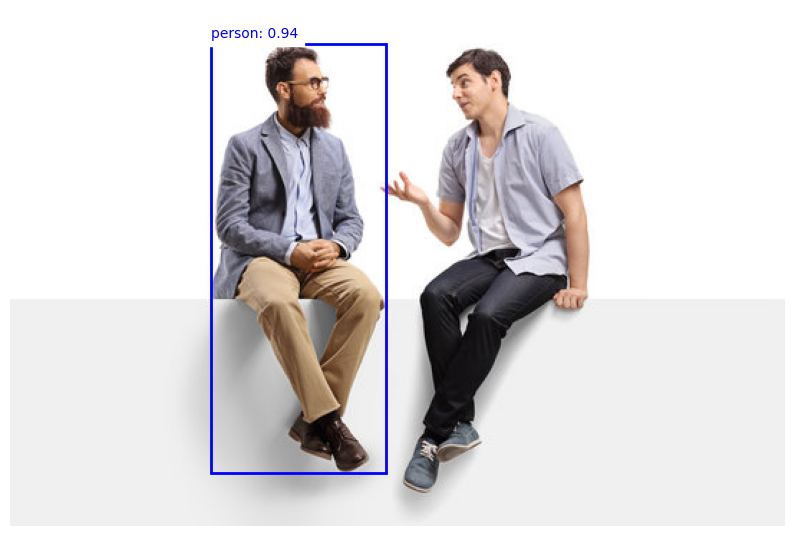

In [5]:
for box in result.boxes:
    plot_detections("/home/dnth/Downloads/two.jpg", boxes=[box])


In [6]:
model.launch_gradio()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


2024-11-10 00:40:16.706 | INFO     | xinfer.models:__init__:63 - Model: ultralytics/yolov8s
2024-11-10 00:40:16.707 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-10 00:40:16.708 | INFO     | xinfer.models:__init__:65 - Dtype: bfloat16



0: 480x640 16 persons, 1 truck, 1 handbag, 55.4ms
Speed: 2.5ms preprocess, 55.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
